In [6]:
import numpy as np
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
# 1.data cleaning 
# 2. EDA exploratory data analysis
# 3.text preprocessing
# 4. model building 
# 5.evaluation
# 6.imporvement
# 7.website
# 8. website

# step 1 Data cleaing

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# drop lastr three column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [12]:
df.sample()


,v1,v2
5392,ham,Ooooooh I forgot to tell u I can get on yovill...


In [13]:
#renaming the columns names
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3744,ham,"Aight, let me know when you're gonna be around..."
2856,ham,Today i'm not workin but not free oso... Gee.....
1559,ham,Single line with a big meaning::::: \Miss anyt...
1436,ham,I jus hope its true that missin me cos i'm re...
4144,ham,Lol I would but despite these cramps I like be...


In [14]:
# use label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [15]:
df['target']=encoder.fit_transform(df['target'])
df


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [16]:
#cheching the missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [17]:
#check for duplicated values
df.duplicated().sum()

403

In [18]:
#remove the duplicate values
df=df.drop_duplicates(keep='first')

# done with data cleaning

# 2.EDA

In [19]:
#understanding of data

# check the %of spam and ham

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

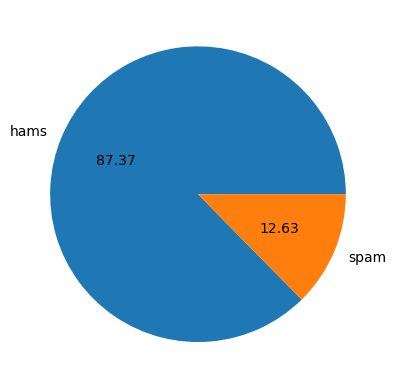

In [20]:
#visulalisation
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['hams','spam'],autopct='%0.2f')
plt.show()

In [21]:
# from the graph we can see that data is inbalanced 

# we use deeper analysis like 
1. number of words
2. number of sentence
3. number of letter
 
we will use nltk library for that

In [22]:
# !pip install nltk

In [23]:
import nltk

In [24]:
# # installing some dependencies for running the nltk
# nltk.download('punkt')

In [25]:
df['num_characters']=df['text'].apply(len)

C:\Users\kaustubh\AppData\Local\Temp\ipykernel_36920\399031894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [26]:
#fetch number of words
# df['text'].apply(lambda x:nltk.word_tokenize(x))<--- this will separate each words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\kaustubh\AppData\Local\Temp\ipykernel_36920\1729282054.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# getting number of sentence
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df

C:\Users\kaustubh\AppData\Local\Temp\ipykernel_36920\265893052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [29]:
df

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [30]:
# describe what hapenningg in all the three
df[['num_characters','num_sent','num_words']].describe()

,num_characters,num_sent,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.947185,18.453279
std,58.236293,1.362406,13.324793
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,28.000000,220.000000


In [31]:
# DESCRIBING THE HAM MESSAGE
df[df['target']==0][['num_characters','num_sent','num_words']].describe()

,num_characters,num_sent,num_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.799601,17.120903
std,56.358207,1.278465,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


In [32]:
# DESCRIBING THE SPAM MESSAGE
df[df['target']==1][['num_characters','num_sent','num_words']].describe()

,num_characters,num_sent,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.967841,27.667688
std,30.137753,1.483201,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,8.000000,46.000000


#   from the above we can see that spam message are generally large in sentences
#plot histogram for ham and spam

In [33]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

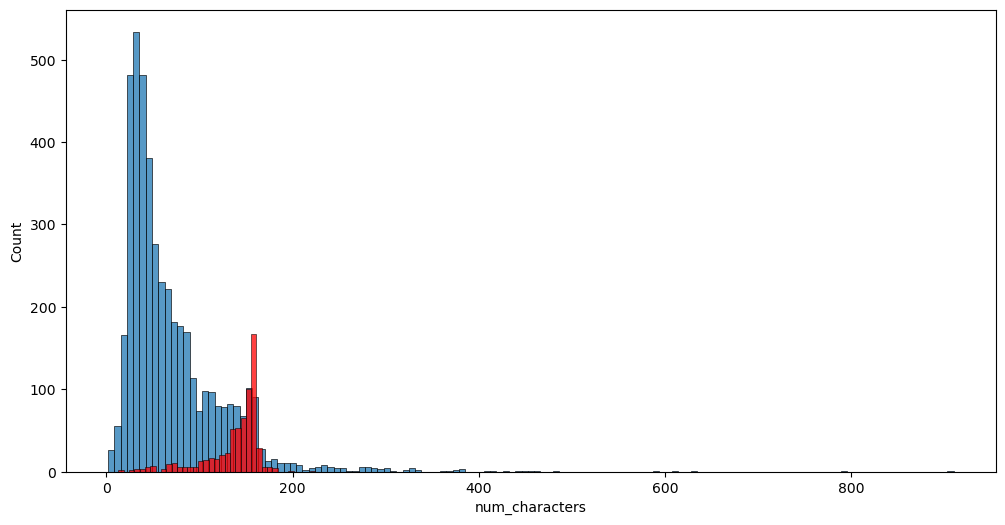

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

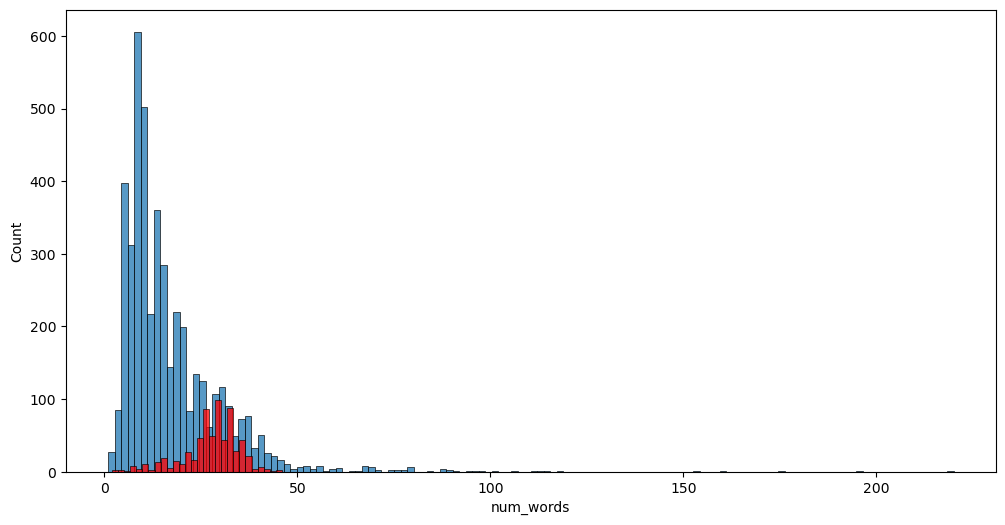

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sent', ylabel='Count'>

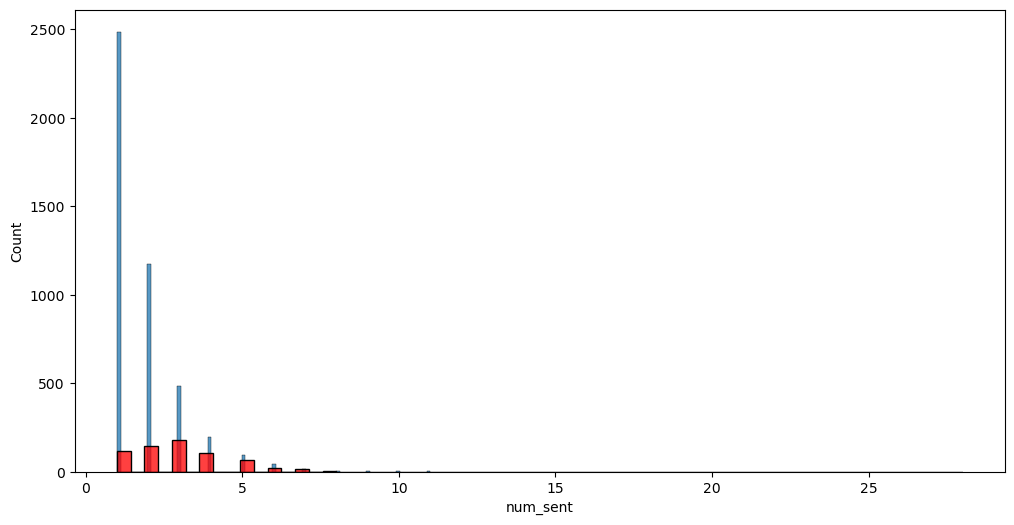

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sent'])
sns.histplot(df[df['target']==1]['num_sent'],color='red')

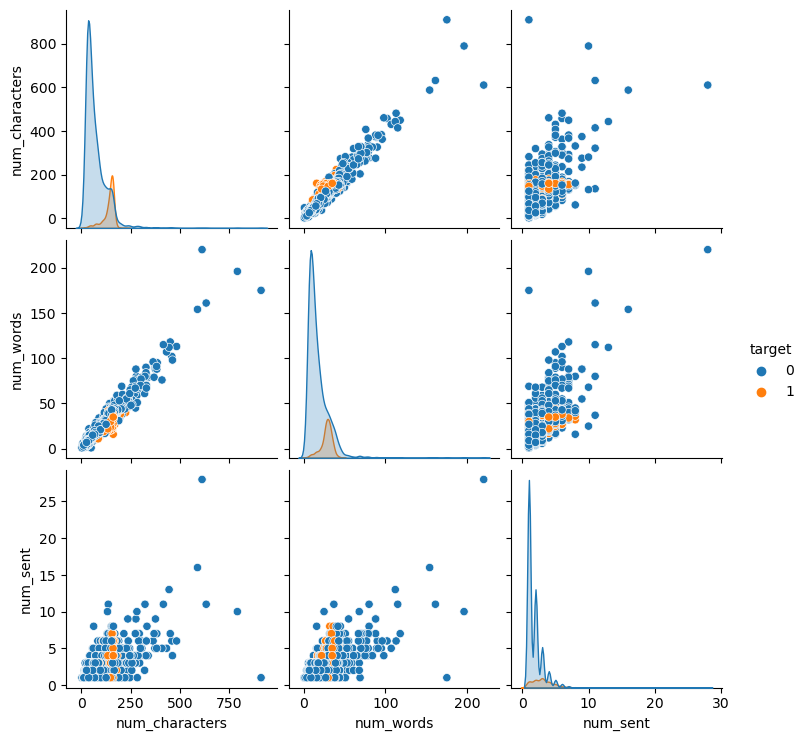

In [37]:
# what rel with diff diff num sentences words and character
sns.pairplot(df,hue='target')

C:\Users\kaustubh\AppData\Local\Temp\ipykernel_36920\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

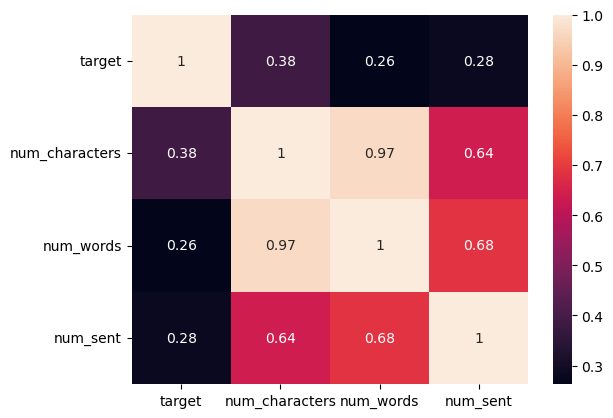

In [38]:
sns.heatmap(df.corr(),annot=True)

In [39]:
from nltk.corpus import stopwords

# 3. DATA Preprocessing 
1. Lower Case
2. Tokenization
3. Removing speical characters
4. Removing stop words(word that is used in sentence forming) and puncutation
5. Stemming ( it make a single word which has for exmaple dance , dancing dance convert it into danc) convert it into root form

In [40]:
# STEMMING
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem("dancing")

'danc'

In [41]:
# removing spl character 
import string
def transform_text(text):
    text=text.lower() # change into lower letter 
    text=nltk.word_tokenize(text)# tokenize each words
    y=[]
    for i in text: # removing spl character 
        if i.isalnum(): 
            y.append(i)
    text=y[: ]
    y.clear()
    for i in text:# removing stopwords and puncutation marks
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:  # for stemming the words
        y.append(ps.stem(i))
    return " ".join(y)

In [42]:
# removing pancutation marks

In [43]:
transform_text(df['text'][5002])

'cd 4u congratul ur award cd gift voucher gift guarante freeentri 2 wkli draw xt music 87066 tnc'

In [44]:
df['text'][5002]

'CDs 4u: Congratulations ur awarded å£500 of CD gift vouchers or å£125 gift guaranteed & Freeentry 2 å£100 wkly draw xt MUSIC to 87066 TnCs www.ldew.com1win150ppmx3age16 '

In [45]:
# STEMMING
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem("dancing")

'danc'

In [46]:
df['transformed_text']=df['text'].apply(transform_text)

C:\Users\kaustubh\AppData\Local\Temp\ipykernel_36920\4139466366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text']=df['text'].apply(transform_text)


In [47]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [48]:
# !pip install wordcloud


In [49]:
# we will create a word cloud of spam and ham
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [50]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

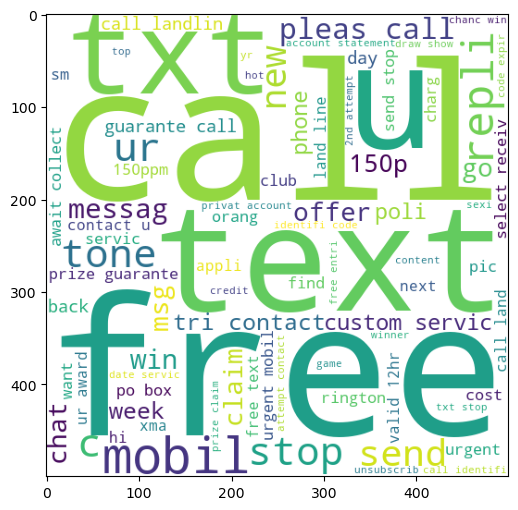

In [51]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [52]:
# print doing for ham message
spam_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

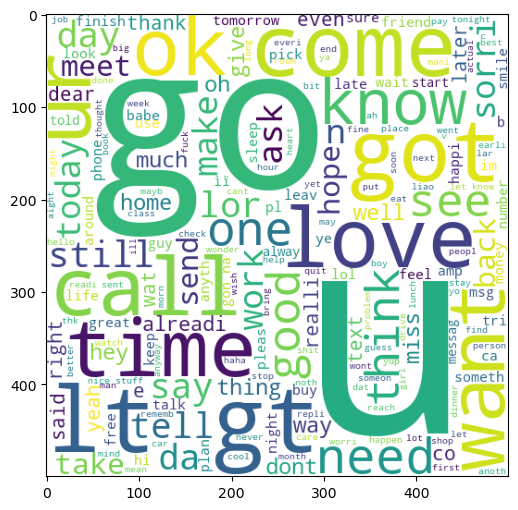

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [54]:
# check top 30 or 50 words from ham and spam messgae
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [56]:
len(spam_corpus)

9939

In [57]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

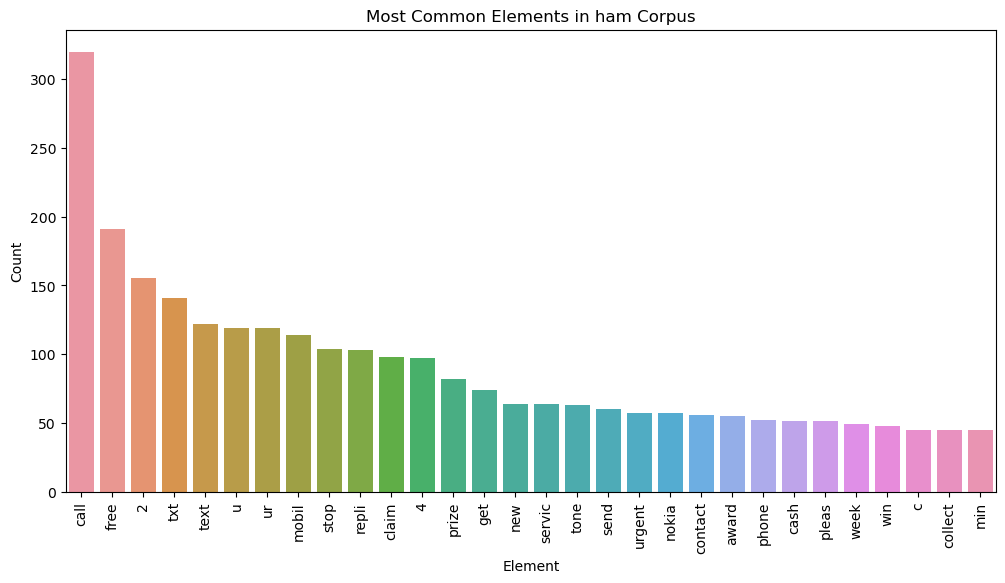

In [58]:
element_counts = Counter(spam_corpus)

# Get the 30 most common elements and create a DataFrame with columns 'Element' and 'Count'
common_elements_df = pd.DataFrame(element_counts.most_common(30), columns=['Element', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Element', y='Count', data=common_elements_df)
plt.xlabel('Element')
plt.ylabel('Count')
plt.title('Most Common Elements in ham Corpus')
plt.xticks(rotation='vertical')
plt.show()

# for han top 30 ham words

In [59]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [60]:
len(ham_corpus)

35394

In [61]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

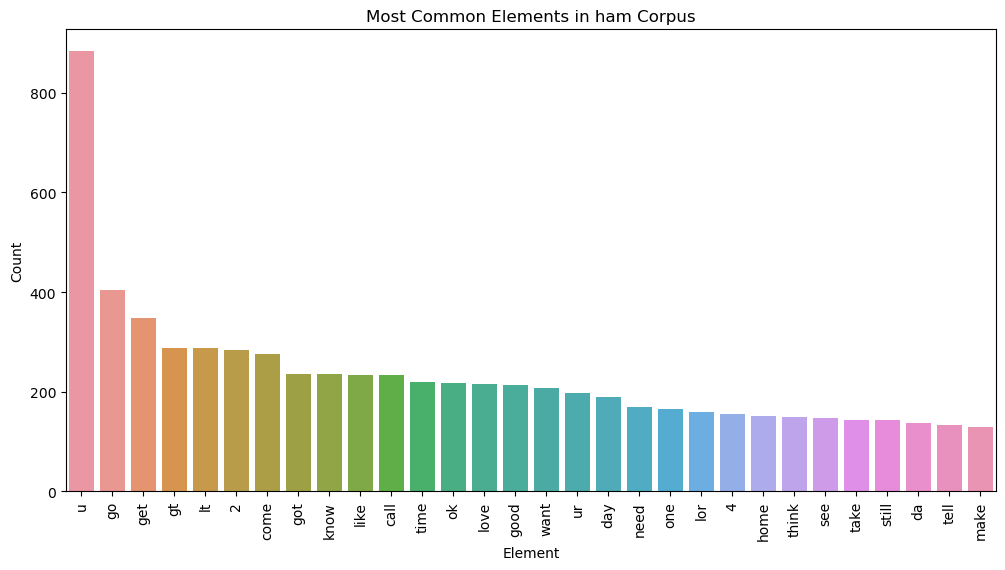

In [62]:
element_counts = Counter(ham_corpus)

# Get the 30 most common elements and create a DataFrame with columns 'Element' and 'Count'
common_elements_df = pd.DataFrame(element_counts.most_common(30), columns=['Element', 'Count'])

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sns.barplot(x='Element', y='Count', data=common_elements_df)
plt.xlabel('Element')
plt.ylabel('Count')
plt.title('Most Common Elements in ham Corpus')
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building
#We will be using navie base algorithm (because in textual data it work best)

In [63]:
# start 
# we wil vectorize the bag of word  by the frequent occurnace of word

In [64]:
#1. vectorize the words using bag of words 
#2. vectorize the words using tfidf vectorizer

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [66]:
# X=cv.fit_transform(df['transformed_text']).toarray()
# as the guassin doest work that well
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
# # scaling the vector  using minMax scaler
# from sklearn.preprocessing import MinMaxScaler
# X=scaler.fit_transform(X)
# this doest make any diff as it decrease the prescision

In [68]:
#appending the num_character col to X
x=np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [69]:
X.shape

(5169, 3000)

In [70]:
y=df['target'].values

In [71]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [72]:
# we will use train_test_split to split the data 

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [76]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [77]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [78]:
# precision is performing very bad approx 53% 

In [79]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [103]:
# in GUASSIAN 
# the accuracy is good but percision score is not good 96%
# as the data is inbalance the accuracy is not matter but precion matter the most
# In TFIDF
# the accuracy is decreases but percision score is great 100% as there is false +ve

In [104]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [105]:
# the accuracy is good and also percision score good which is approx 97% in Guassian 
# the accuracy is same and the precision is also same which is 97% in TFIDF

In [106]:
# we  had chosen MNB as TFIDF because it give highest precion as there is inblance data the accuracy is not precison matter the most

# we will use multiple algo to precict the spam checks which works better

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [108]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB() 
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [109]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb  }

In [110]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    confusion=confusion_matrix(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision
         

In [111]:
train_classifier(svc,X_train,X_test,y_train,y_test)

(0.9758220502901354, 0.9747899159663865)

In [112]:
accuracy_scores=[]
precision_scores=[]
for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,X_test,y_train,y_test)
    print("For ",name )
    print("Accuracy ",current_accuracy)
    print("Precision ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy  0.9758220502901354
Precision  0.9747899159663865
For  KN
Accuracy  0.9052224371373307
Precision  1.0
For  NB
Accuracy  0.9709864603481625
Precision  1.0
For  DT
Accuracy  0.9303675048355899
Precision  0.8173076923076923
For  LR
Accuracy  0.9584139264990329
Precision  0.9702970297029703
For  RF
Accuracy  0.9748549323017408
Precision  0.9827586206896551
For  AdaBoost
Accuracy  0.960348162475822
Precision  0.9292035398230089
For  BgC
Accuracy  0.9574468085106383
Precision  0.8671875
For  ETC
Accuracy  0.9748549323017408
Precision  0.9745762711864406
For  GBDT
Accuracy  0.9477756286266924
Precision  0.92
For  xgb
Accuracy  0.971953578336557
Precision  0.943089430894309


In [119]:
performance_df=pd.DataFrame({'Alogrithm':clfs.keys(),'Accuracy':accuracy_scores,'Percision':current_precision}).sort_values('Percision',ascending=False)

In [120]:
performance_df

,Alogrithm,Accuracy,Percision
0,SVC,0.975822,0.943089
1,KN,0.905222,0.943089
2,NB,0.970986,0.943089
3,DT,0.930368,0.943089
4,LR,0.958414,0.943089
5,RF,0.974855,0.943089
6,AdaBoost,0.960348,0.943089
7,BgC,0.957447,0.943089
8,ETC,0.974855,0.943089
9,GBDT,0.947776,0.943089


In [123]:
performance_df1 = pd.melt(performance_df, id_vars = "Alogrithm")

In [124]:
performance_df1

,Alogrithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.930368
4,LR,Accuracy,0.958414
5,RF,Accuracy,0.974855
6,AdaBoost,Accuracy,0.960348
7,BgC,Accuracy,0.957447
8,ETC,Accuracy,0.974855
9,GBDT,Accuracy,0.947776


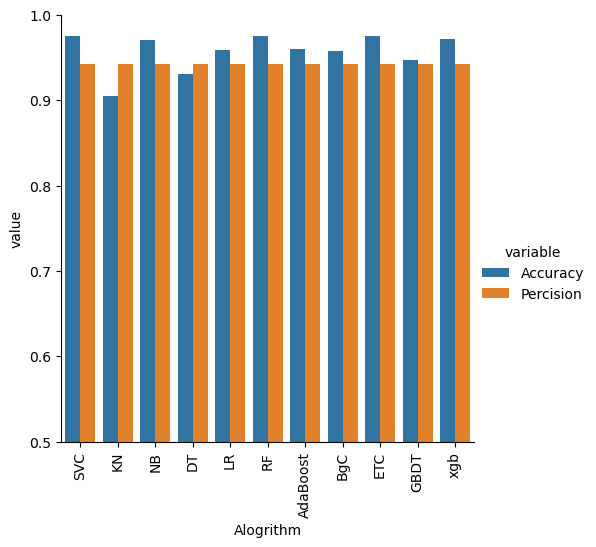

In [131]:
sns.catplot(x = 'Alogrithm', y='value',
            hue='variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()


In [133]:
# improve the model performance
# 1.change the max_feature of tfidf change the max_feature to 3000

In [137]:
temp_df = pd.DataFrame({'Alogrithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [138]:
temp_df = pd.DataFrame({'Alogrithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [139]:
new_df = performance_df.merge(temp_df,on='Alogrithm')

In [140]:
new_df_scaled = new_df.merge(temp_df,on='Alogrithm')

In [141]:
temp_df = pd.DataFrame({'Alogrithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [142]:
new_df_scaled.merge(temp_df,on='Alogrithm')

,Alogrithm,Accuracy,Percision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.975822,0.943089,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
1,KN,0.905222,0.943089,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
2,NB,0.970986,0.943089,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
3,DT,0.930368,0.943089,0.930368,0.817308,0.930368,0.817308,0.930368,0.817308
4,LR,0.958414,0.943089,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
5,RF,0.974855,0.943089,0.974855,0.982759,0.974855,0.982759,0.974855,0.982759
6,AdaBoost,0.960348,0.943089,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,BgC,0.957447,0.943089,0.957447,0.867188,0.957447,0.867188,0.957447,0.867188
8,ETC,0.974855,0.943089,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
9,GBDT,0.947776,0.943089,0.947776,0.920000,0.947776,0.920000,0.947776,0.920000


In [143]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [144]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [145]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [146]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [147]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [148]:
from sklearn.ensemble import StackingClassifier

In [149]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [82]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))